#  SAe 5 avec reconnaissance automatique de fruit

|**RENDRE CE FICHIER EN PDF**|
|---|

- Etudiant 1: Januzi Rinor
- Etudiant 2: Mammeri Rayan

Dans cette étape de la SAé, nous mettons en oeuvre des réseaux de neurones convolutifs (Convolutional neural networks, CNN). Nous allons utiliser la bibliothèque Tensorflow par l'intermédiaire de l'API Keras qui simplifie la manipulation des réseaux. De nombreuses ressources pédagogiques sont disponibles sur la page web de Tensorflow: elles pourront vous être utiles en stage, pour un projet, etc.

La partie "prédiction" de est partiellement une adaptation simplifiée de [cette page](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html) du blog de François Chollet, papa de Keras. Lisez cette page __à la fin du TP__, notamment ce qui concerne la génération d'images synthétiques pour augmenter la base d'apprentissage, que nous n'abordons pas ici par souci de simplicité. 

Nous allons donc adapter les réseaux décrits sur la page du blog de la manière suivante:
- il faut 1 neurones sur la couche de sortie, qui doit être de type `sigmoid`
- le _loss_ est de type `binary_crossentropy`.


In [1]:
import tensorflow as tf
print("Version de TensorFlow :", tf.__version__)

Version de TensorFlow : 2.18.0


# Base d'apprentissage

1. Faire une 50aine de photos de chaque fruit 'en changeant le fond, l'orientation, le zoom, etc)
2. Faire un dossier pour chaque fruit
3. Faire un dossier ``Data``  comprenant le dossier avec les images de chaque fruit



On commence par charger quelques bibliothèques et définir la fonction `display_test` (comme dans l'exercice précédent).

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import model_selection

%matplotlib inline

def display_test(X_image_test,Y_test,Y_test_pred,dict_classes,txt):
    # affiche les résultats de classification pour 120 images aléatoires
    # paramètres: 
    # X_image_test: tableau des images de test 
    # Y_test: classes d'appartenance réelles
    # Y_test_pred: classes prédites
    # txt: légende de la figure
    alea=np.random.choice(len(X_image_test),size=120,replace=False)
    plt.figure(figsize=[18,12])    
    for n in range(120):
        plt.subplot(12,10,n+1,xticks=[],yticks=[])
        plt.imshow(X_image_test[alea[n]],cmap='gray')
        if Y_test_pred[alea[n]]==Y_test[alea[n]]:
            plt.text(0.1,0.1,str(dict_classes[Y_test_pred[alea[n]]])+' / '+str(dict_classes[Y_test[alea[n]]]),fontsize=8,bbox=dict(facecolor='white', alpha=1))
        else:
            plt.text(0.1,0.1,str(dict_classes[Y_test_pred[alea[n]]])+' / '+str(dict_classes[Y_test[alea[n]]]),fontsize=8,bbox=dict(facecolor='red', alpha=1))
    plt.suptitle('prediction '+txt+'  --  classe prédite / classe réelle')
    plt.show()

On charge à présent les données. Comme les réseaux de neurones utilisés exigent des images de taille identique en entrée, il va falloir redimensionner les images de la base de données avant de les stocker dans les tableaux `X_train` et `X_test`. On choisit une taille de redimensionnement de $150\times 150$ pixels.

In [3]:
from PIL import Image  # on utilise la bibliothèque de manipulation d'image PIL pour redimensionner les images

# modifiez ici le chemin d'accès à vos données si besoin:
path="./data/" 
image_size = (150, 150)
batch_size = 8


X=[]
Y=[]
X_image=[]
X_train=[]
X_test=[]
dict_class_names={}  # dictionnaire associant labels et noms des classes

y=0  # numéro de classe

for directory in os.listdir(path):
    count = 0 # indice de l'image traitée dans le répertoire courant
    print("%s  - classe: %d" % (directory,y))
    dict_class_names[y]=directory[4:]
    for file in os.listdir(path+directory):
        img = plt.imread(path+directory+"/"+file)
        if (len(img.shape)==2):
            img=np.repeat(img[:,:,np.newaxis],3,axis=2)        
        X_image.append(img)
        Y.append(y)
        count = count+1
    y = y+1
    
X_image_train, X_image_test, Y_train, Y_test = model_selection.train_test_split(X_image, Y, test_size=0.2, random_state=1)

for i in range(len(X_image_train)):
    img=X_image_train[i]
    imgresize=np.array(Image.fromarray(img).resize(image_size))/256  # images redimensionnées, et canaux normalisés entre 0 et 1
    X_train.append(imgresize)

for i in range(len(X_image_test)):
    img=X_image_test[i]
    imgresize=np.array(Image.fromarray(img).resize(image_size))/356  # images redimensionnées, et canaux normalisés entre 0 et 1
    X_test.append(imgresize)


# tensorflow demande que les données soient représentées comme un tableau numpy:    
X_train=np.asarray(X_train)
Y_train=np.asarray(Y_train)
X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)

print("base d'apprentissage: %d images" %X_train.shape[0])
print("base de test: %d images" %X_test.shape[0])
print("\ndimension des tableaux:")
print("X_train")
print(X_train.shape)
print("Y_train")
print(Y_train.shape)
print("X_test")
print(X_test.shape)
print("Y_test")
print(Y_test.shape)


banane  - classe: 0
orange  - classe: 1
test  - classe: 2
base d'apprentissage: 84 images
base de test: 22 images

dimension des tableaux:
X_train
(84, 150, 150, 3)
Y_train
(84,)
X_test
(22, 150, 150, 3)
Y_test
(22,)


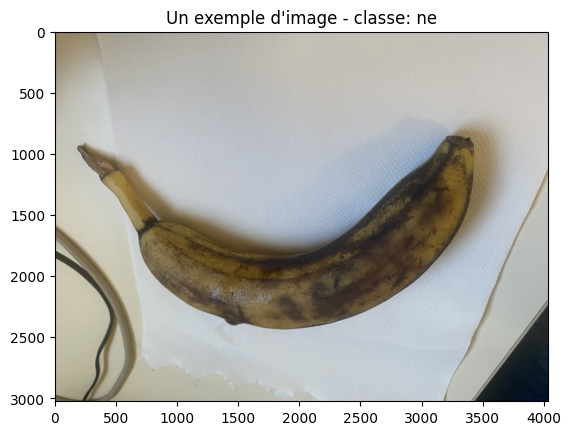

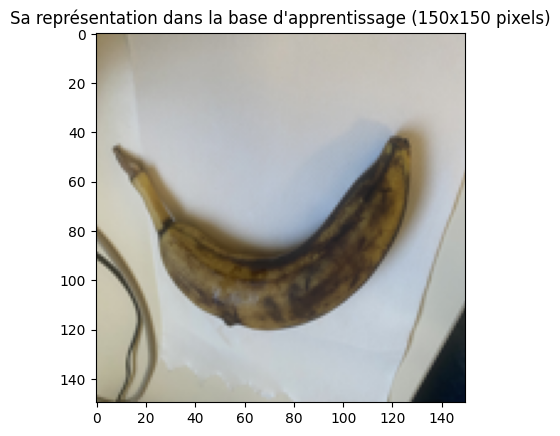

In [4]:
n_image=49  # essayez d'autres valeurs
plt.figure()
plt.imshow(X_image_train[n_image]);
plt.title("Un exemple d'image - classe: "+str(dict_class_names[Y_train[n_image]]));
plt.figure()
plt.imshow(X_train[n_image].reshape(image_size[0],image_size[1],3))
plt.title("Sa représentation dans la base d'apprentissage (150x150 pixels)")
plt.show()

1. **Afficher votre base d'images sous forme de tableau** (*3 pts*)

Banane


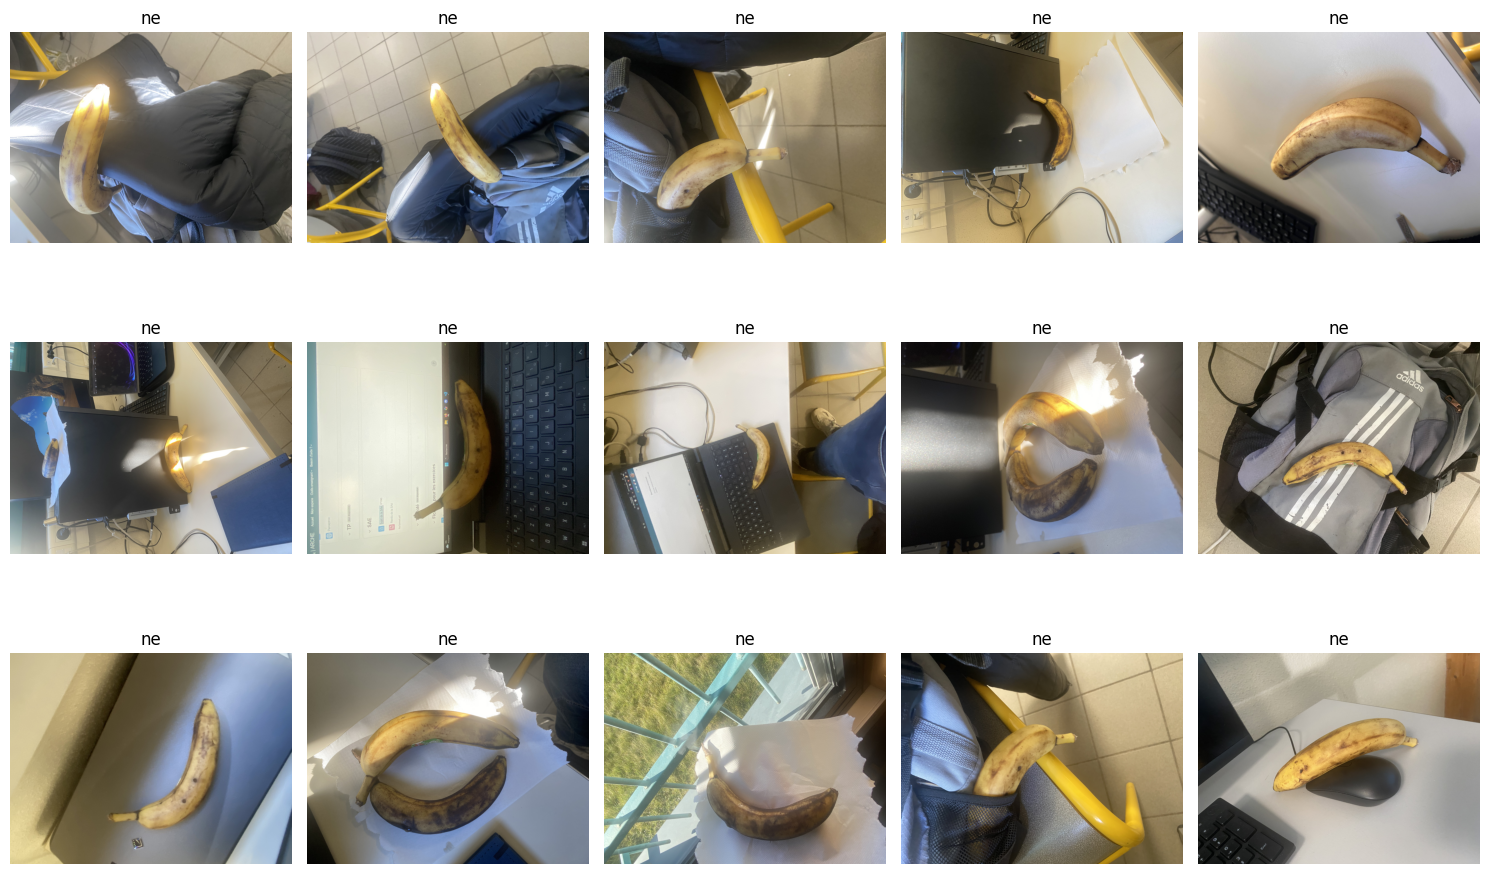

In [5]:
def display_image_grid(images, labels, class_names, rows=3, cols=5):
	fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
	axes = axes.flatten()
	for img, lbl, ax in zip(images, labels, axes):
		ax.imshow(img)
		ax.set_title(class_names[lbl])
		ax.axis('off')
	plt.tight_layout()
	plt.show()

print("Banane")
banana_images = [img for img, lbl in zip(X_image_train, Y_train) if lbl == 0]
banana_labels = [lbl for lbl in Y_train if lbl == 0]

display_image_grid(banana_images[:15], banana_labels[:15], dict_class_names, rows=3, cols=5)


Orange


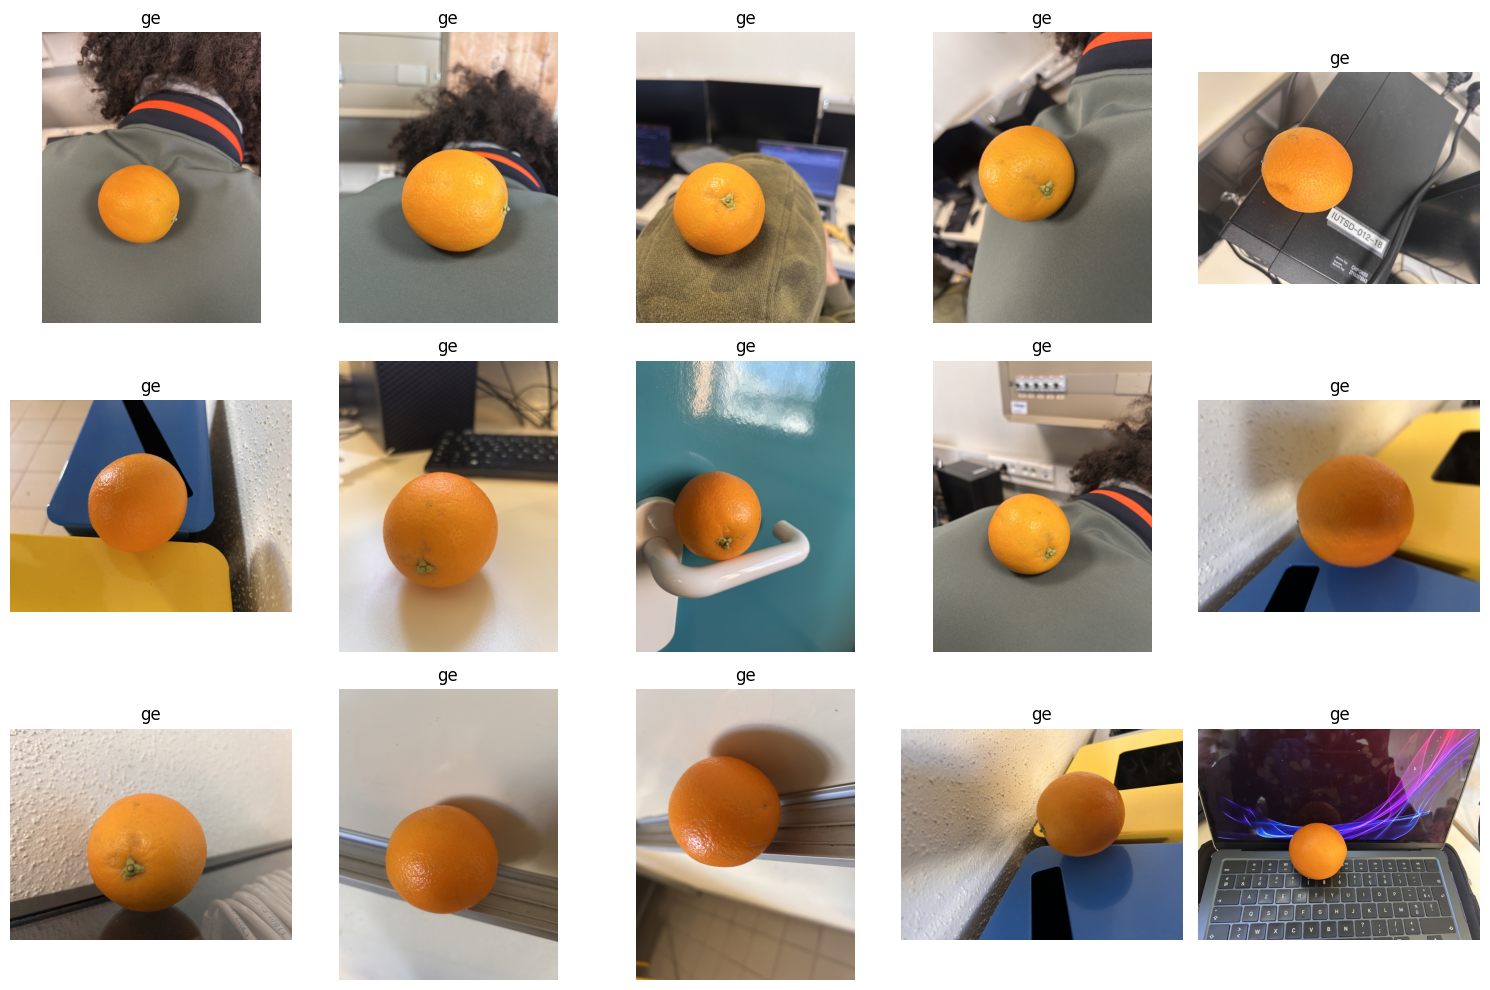

In [6]:
print("Orange")
banana_images = [img for img, lbl in zip(X_image_train, Y_train) if lbl == 1]
banana_labels = [lbl for lbl in Y_train if lbl == 1]
display_image_grid(banana_images[:15], banana_labels[:15], dict_class_names, rows=3, cols=5)


<br>

## Classification par un réseau convolutif

Nous allons tester le premier réseau étudié dans le blog de F. Chollet, inspiré des réseaux convolutifs comme __[LeNet5](http://yann.lecun.com/exdb/lenet/index.html)__ proposés par __[Yann Le Cun](https://fr.wikipedia.org/wiki/Yann_Le_Cun)__ dans les années 1990.

Le réseau est formé des couches suivantes.

Partie "définition de descripteurs" ( _features_ ):
- entrée: un image couleur (trois canaux: rouge, vert, bleu) de taille $150\times 150$ pixels
- une couche convolutive de 32 filtres de couverture spatiale $3\times3$ pixels (ce sont donc des filtres $3\times 3\times 3$ car ils agissent sur les trois canaux), chaque neurone ayant une activation ReLU.
- une couche `MaxPooling` réduisant d'un facteur 2 la largeur et hauteur des sorties (mais pas la profondeur)
- une couche convolutive de 64 filtres $3\times3$, activation ReLU
- une couche `MaxPooling` 

Partie "classification", qui ressemble au perceptron multi-couches de l'exercice précédent:
- pour commencer on "applatit" la couche finale de la partie précédente, qui est alors vue comme une colonne de neurones.
- une couche "fully connected" de 64 neurones, activation ReLU, et dropout de 0.5. Cela signifie que pendant l'apprentissage, pour chaque batch traité on élimine aléatoirement 50% des connexions. Cela a pour effet d'éviter que le réseau s'adapte trop bien aux données d'apprentissage, et donc d'éviter le surapprentissage, comme expliqué dans le polycopié. Naturellement, lorsque le réseau est utilisé après apprentissage pour faire une prédiction (étape dite d'inférence), il n'y a pas de _dropout_. 
- une couche de sortie sigmoid à 1 neurones (car nous devons discriminer 1 seule classe)

__Remarque:__ si vous utilisez une version de Tensorflow > 2.16, vous aurez un avertissement (`UserWarning: Do not pass an input_shape/input_dim argument to a layer`) dû au passage à Keras 3.0, dont nous ne tiendrons pas compte.

- Faire l'arborescence du réseau de réseau de neuronne
- Faire l'entrainement
- Afficher les courbes d'apprentissages

Suivre ce pipeline et, dans le compte rendu, afficher les courbes d'apprentissages avec :

2. **Le réseau décrit dans le sujet (2 couches de convolution, un dropout de 0.5)**  (*3 pts*)
3. **La même chose mais avec augmentation de données**  (*3 pts*)
4. **Avec augmentation de données et sans dropout**  (*2 pts*)
5. **Avec augmentation et avec une 3ème couche de convolution**  (*3 pts*)
6. **En utilisant des poids pré-entrainés**  (*1 pts*)

In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import model_selection
from PIL import Image
import tensorflow as tf

In [ ]:
path = "./data/"
image_size = (150, 150)
batch_size = 32

X_image = []
Y = []
X_train = []
X_test = []
dict_class_names = {}

y = 0

for directory in os.listdir(path):
    count = 0
    print("%s  - classe: %d" % (directory, y))
    dict_class_names[y] = directory[4:]
    for file in os.listdir(path + directory):
        img = plt.imread(path + directory + "/" + file)
        if len(img.shape) == 2:
            img = np.repeat(img[:, :, np.newaxis], 3, axis=2)
        X_image.append(img)
        Y.append(y)
        count += 1
    y += 1

X_image_train, X_image_test, Y_train, Y_test = model_selection.train_test_split(X_image, Y, test_size=0.2, random_state=1)

for i in range(len(X_image_train)):
    img = X_image_train[i]
    imgresize = np.array(Image.fromarray(img).resize(image_size)) / 255.0
    X_train.append(imgresize)

for i in range(len(X_image_test)):
    img = X_image_test[i]
    imgresize = np.array(Image.fromarray(img).resize(image_size)) / 255.0
    X_test.append(imgresize)

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)

print("base d'apprentissage: %d images" % X_train.shape[0])
print("base de test: %d images" % X_test.shape[0])
print("\ndimension des tableaux:")
print("X_train")
print(X_train.shape)
print("Y_train")
print(Y_train.shape)
print("X_test")
print(X_test.shape)
print("Y_test")
print(Y_test.shape)

banane  - classe: 0
orange  - classe: 1


In [ ]:
# Le réseau décrit dans le sujet (2 couches de convolution, un dropout de 0.5)
model_1 = Sequential()

model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=(150, 150, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_1 = model_1.fit(X_train, Y_train, epochs=25, batch_size=16, validation_data=(X_test, Y_test))

plt.plot(history_1.history['accuracy'], label='accuracy')
plt.plot(history_1.history['val_accuracy'], label='val_accuracy')
plt.plot(history_1.history['loss'], label='loss')
plt.plot(history_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# La même chose mais avec augmentation de données
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow(X_train, Y_train, batch_size=32)

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=(150, 150, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_2 = model_2.fit(train_generator, epochs=25, validation_data=(X_test, Y_test))

plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['loss'], label='loss')
plt.plot(history_2.history['val_accuracy'], label='val_accuracy')
plt.plot(history_2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Avec augmentation de données et sans dropout
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow(X_train, Y_train, batch_size=32)

model_3 = Sequential()

model_3.add(Conv2D(32, (3, 3), padding='same', input_shape=(150, 150, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Flatten())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_3 = model_3.fit(train_generator, epochs=25, validation_data=(X_test, Y_test))

plt.plot(history_3.history['accuracy'], label='accuracy')
plt.plot(history_3.history['loss'], label='loss')
plt.plot(history_3.history['val_accuracy'], label='val_accuracy')
plt.plot(history_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Avec augmentation et avec une 3ème couche de convolution

train_generator = datagen.flow(X_train, Y_train, batch_size=32)

model_4 = Sequential()

model_4.add(Conv2D(32, (3, 3), padding='same', input_shape=(150, 150, 3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(64, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(128, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Flatten())
model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_4 = model_4.fit(train_generator, epochs=40, validation_data=(X_test, Y_test))

plt.plot(history_4.history['accuracy'], label='accuracy')
plt.plot(history_4.history['loss'], label='loss')
plt.plot(history_4.history['val_accuracy'], label='val_accuracy')
plt.plot(history_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model_5 = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_5 = model_5.fit(train_generator, epochs=25, validation_data=(X_test, Y_test))

plt.plot(history_5.history['accuracy'], label='accuracy')
plt.plot(history_5.history['loss'], label='loss')
plt.plot(history_5.history['val_accuracy'], label='val_accuracy')
plt.plot(history_5.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Prédiction

La commande````predic``` permet de calculer les prédictions du réseau sur la base test. Il s'agit des probabilités a posteriori de chaque classe, on assigne donc chaque observation à la classe de probabilité maximale. 

- Prendre 10 nouvelles photos des fruits en variant le fond pour chacune des 10 images.
7. **Tester vos modèles sur les 10 images en utilisant un tableau et des boucles.**  (*4 pts*)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Chemin vers le dossier de validation
validation_dir = './validation/'

# Paramètres
img_size = 150

# Charger le modèle
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.load_weights('model.h5')

def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

test_images = []
test_labels = []

for fruit in ['banane', 'orange']:
    for i in range(10):
        img_path = os.path.join(validation_dir, f'IMG_{i+1}.jpg')
        if os.path.exists(img_path):
            img_array = load_and_preprocess_image(img_path)
            test_images.append(img_array)
            test_labels.append(fruit)
        else:
            print(f"Image not found: {img_path}")

test_images = np.vstack(test_images)

predictions = model.predict(test_images)

for i, (pred, label) in enumerate(zip(predictions, test_labels)):
    predicted_label = "Orange" if pred > 0.5 else "Banane"
    print(f'Image {i+1}: Prediction: {predicted_label}, Actual: {label}')

# Mise en production

Créer une appli web pour reconnaître les deux fruits.

###  A rendre :
8. **Le code de l'appli web (html, css et js)** (*0.5 pts*)
9. **Le modèle utilisé par l'appli web**  (*0.5 pts*)